In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mnist import load_mnist

# !pip install scikit-learn

In [4]:
train, validation, test = load_mnist()

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [5]:
train[0].shape

(55000, 28, 28, 1)

Text(0.5, 1.0, 'Цифра 7')

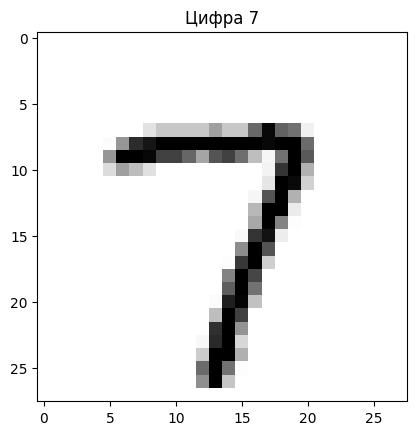

In [6]:
plt.imshow(train[0][100], cmap='binary')
plt.title('Цифра ' + str(train[1][100]))

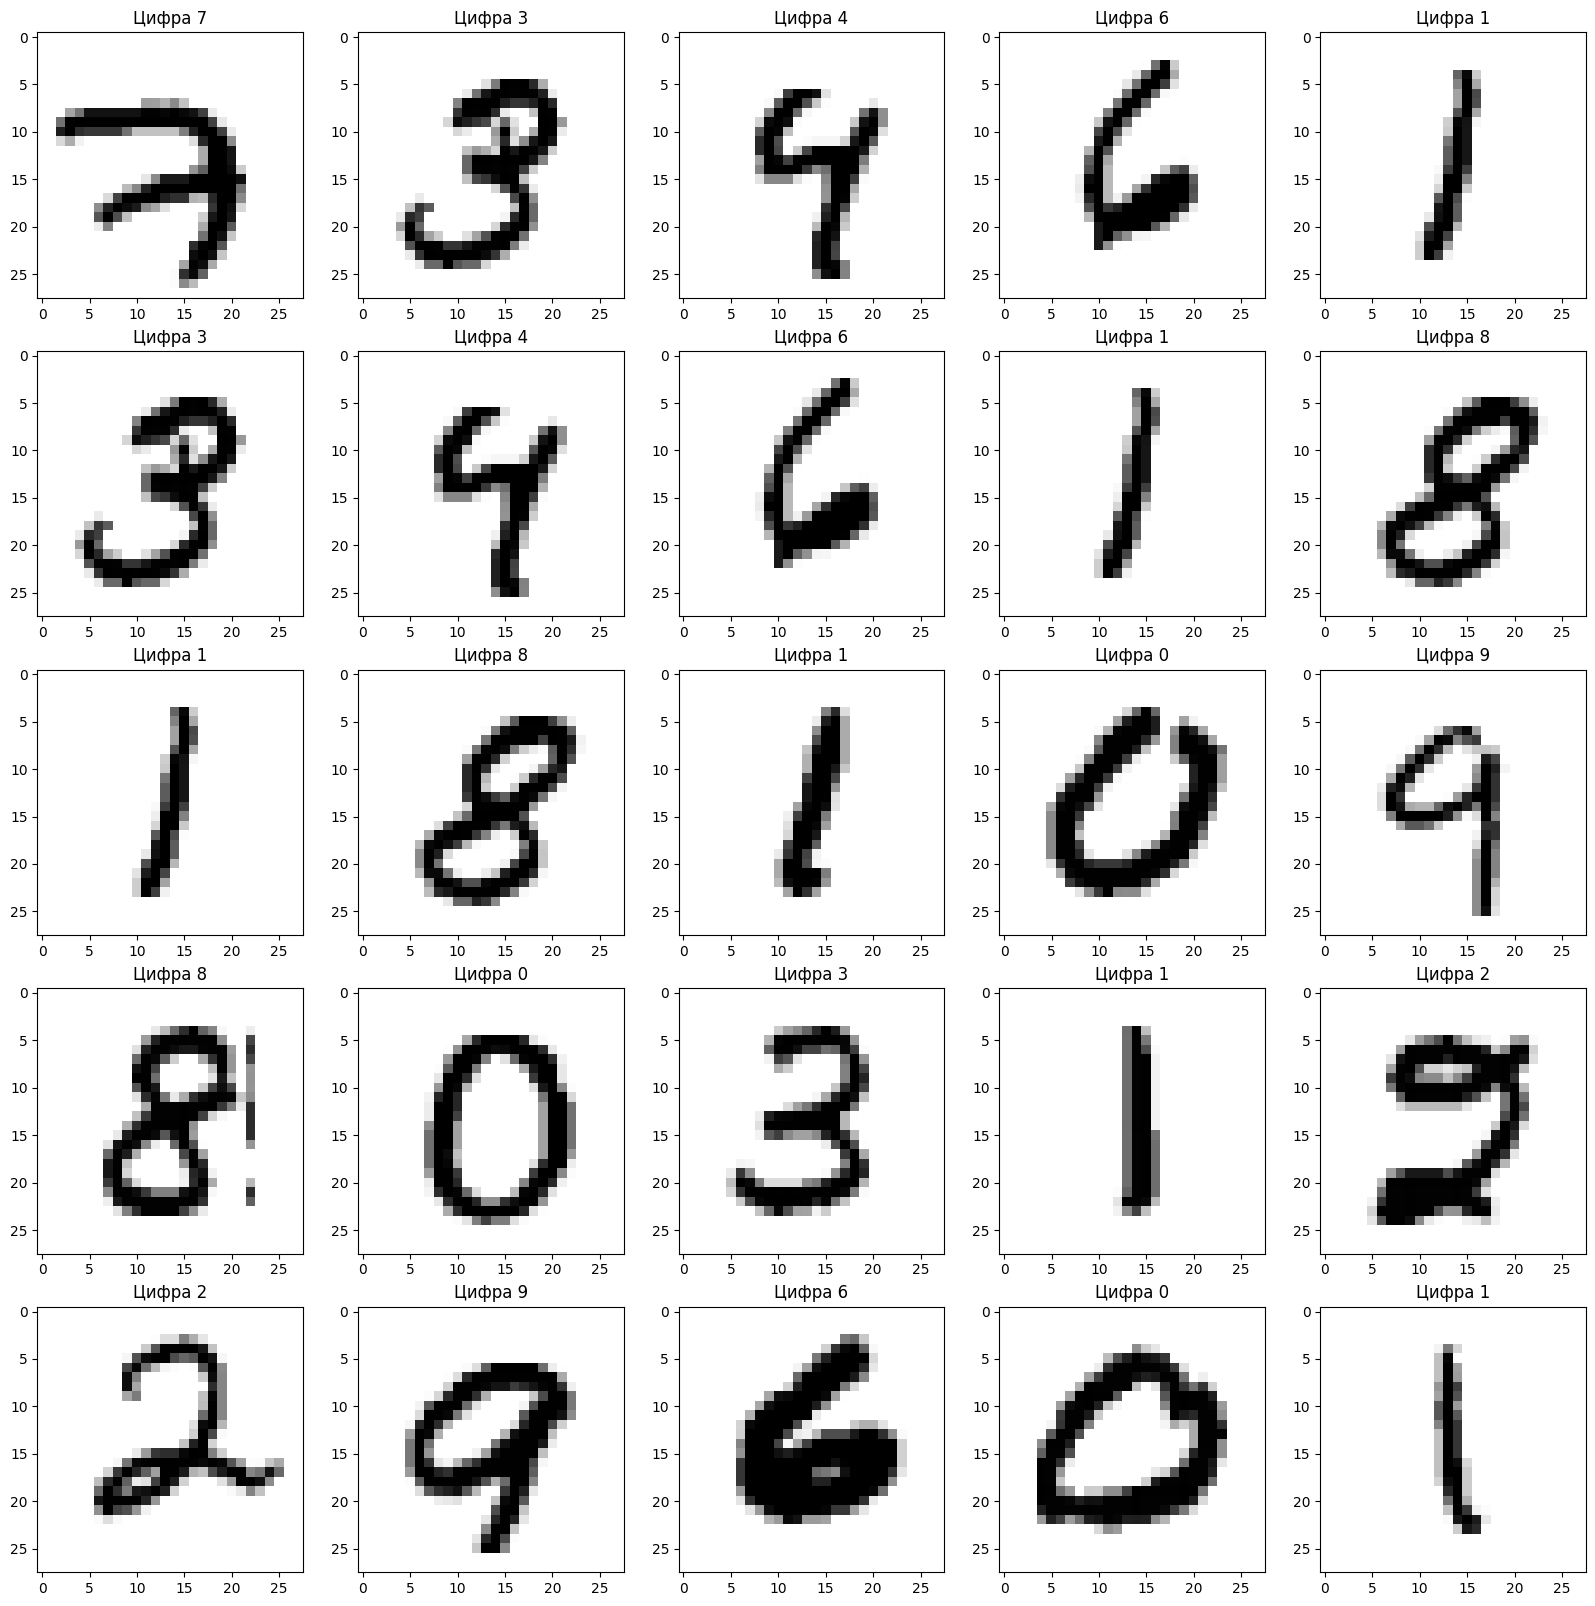

In [7]:
fig, axis = plt.subplots(5, 5, figsize = (20, 20))
for i in range(5):
    for j in range(5):
        axis[i, j].imshow(train[0][i**2 + j], cmap = 'binary')
        axis[i, j].set_title('Цифра ' + str(train[1][i**2 + j]))

In [8]:
class my_PCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        X1 = np.zeros((28,28))
        X1[:,:] = X[:,:,0]
        X1_mean = np.mean(X1, axis = 0)
        X1 -= X1_mean
        
        C = np.dot(X1.T, X1)
        
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        return X1, F, l
    
    def transform(self, X, F):
        Y = np.dot(X, F)
        return Y
    
    def fit_transform(X):
        X_c, F, l = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

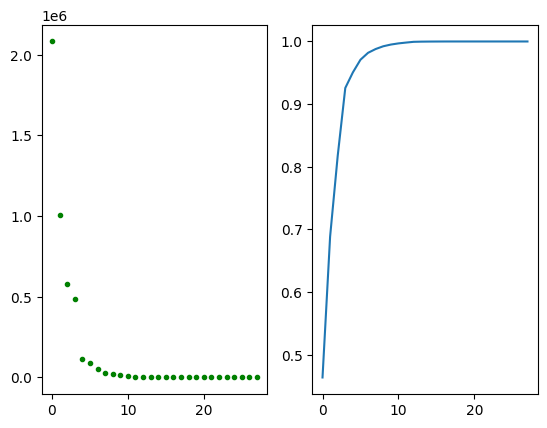

In [9]:
test = my_PCA(2)
X1, F, l = test.fit(train[0][0])
plt.subplot(1, 2, 1)
plt.plot(l, marker = '.', linestyle = '', color = 'g')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(l) / np.sum(l))